In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime
pd.set_option('display.max_columns', 500) #show all columns
import os
pd.set_option('display.float_format', lambda x: f'%.{len(str(x%1))-2}f' % x) #display eventual float format
os.listdir()

## RQ1] After collecting information, the Data Scientists have to know what dataset they are dealing with, so let's start with an Exploratory Data Analysis (EDA). What can you say about our datasets? Please summarise its main characteristics with visual and tabular methods.

In [2]:
data_profiles = pd.read_csv('instagram_profiles.csv', delimiter='\t')

First of all we import the instagram profiles dataset and we want to analyze them so we visualize the head and the tail of our dataframe beacuse we imagine that it has huge dimension.

In [2]:
type(data_profiles) #we check that it is a dataframe

pandas.core.frame.DataFrame

In [3]:
data_profiles.head()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,4184446,4.721050e+09,jphillip033,John Pierce,"""Document Everything Always""",250.0,146.0,170.0,NaN,2019-08-01 14:38:55.394 -0400,False
1,4184457,5.905830e+08,mama_haas,Deanna,Trying to enjoy the simple things in life. Kni...,534.0,1145.0,2878.0,www.etsy.com/shop/MamaHaas69,2019-08-01 14:39:36.526 -0400,False
2,4184460,1.074147e+09,yellowlightbreen,Eliza Gray,Maine is for Lovers,469.0,324.0,431.0,elizajanegray.com,2019-08-01 14:39:54.407 -0400,False
3,4184461,1.472039e+09,tec1025,Thomas Clark,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:06.472 -0400,NaN
4,4184462,3.531421e+09,luckyfluff,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:07.806 -0400,NaN


In [4]:
data_profiles.tail()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
4509581,4184467,1.418322e+09,karenarkesteyn,Karen Arkesteyn,🙏🏻,468.0,481.0,497.0,NaN,2019-08-01 14:40:26.554 -0400,False
4509582,4184469,1.340704e+07,jornvlaeminck,Jorn Vlaeminck,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:41.628 -0400,NaN
4509583,4184470,6.007354e+09,s_degol,Sanne Degol,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:40:42.983 -0400,NaN
4509584,4184473,2.338990e+07,anwilms,An Wilms,Fashion - travel - photography ... that's me!👗...,504.0,153.0,183.0,NaN,2019-08-01 14:40:49.982 -0400,False
4509585,4184511,2.088094e+09,arnaubassols_,Arnau Bassols Noguer,NaN,NaN,NaN,NaN,NaN,2019-08-01 14:42:30.055 -0400,NaN


In [5]:
data_profiles.shape #we get the dimensions of the dataset

(4509586, 11)

We are interested in the dimension of our dataframe. So with the command shape we discover that the rows are 4509586 and the columns are 11.
If we prefer to work with a reduced dataframe we can extract the first 1500000 rows.

In [98]:
top_profiles=pd.read_csv('instagram_profiles.csv', delimiter='\t', nrows=1500000)

In [6]:
data_profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4509586 entries, 0 to 4509585
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   sid                  int64  
 1   profile_id           float64
 2   profile_name         object 
 3   firstname_lastname   object 
 4   description          object 
 5   following            float64
 6   followers            float64
 7   n_posts              float64
 8   url                  object 
 9   cts                  object 
 10  is_business_account  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 378.5+ MB


Thanks to this code we discover that there are five quantitative variables and the rest of them are qualitatives. A figurative rappresentation of the dataframe is the following:

In [ ]:
data_profiles.plot.hist(legend=True, range=[0,30000])

In particular for the following, followers and n_posts variables:

<AxesSubplot:ylabel='Frequency'>

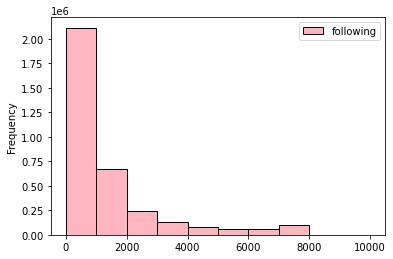

In [111]:
data_profiles.following.plot.hist(range=[0,10000], edgecolor='black', color="lightpink", legend=True)

<AxesSubplot:ylabel='Frequency'>

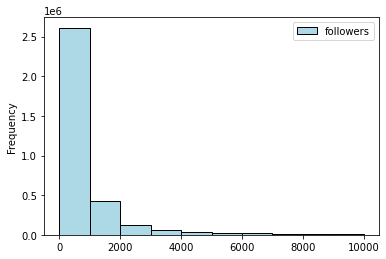

In [112]:
data_profiles.followers.plot.hist(range=[0,10000], edgecolor='black',color="lightblue", legend=True)

<AxesSubplot:ylabel='Frequency'>

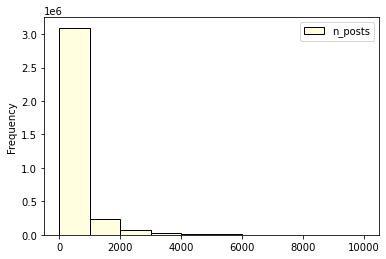

In [113]:
data_profiles.n_posts.plot.hist(range=[0,10000], edgecolor='black', color="lightyellow", legend=True)

False    2590069
True      855254
Name: is_business_account, dtype: int64


<AxesSubplot:xlabel='is_business_account', ylabel='count'>

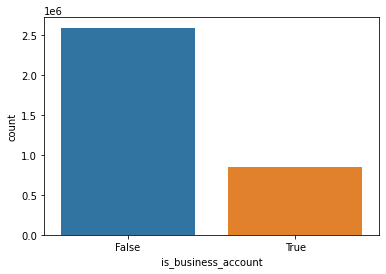

In [27]:
print(data_profiles["is_business_account"].value_counts())
import seaborn as sns

sns.countplot(x="is_business_account", data=data_profiles)

We know that is_business_account is a boolean variable beacuse it contains only True and False values and we can visualize it with this barplot.

In [7]:
data_profiles.describe()

,sid,profile_id,following,followers,n_posts
count,4.509586e+06,4.477139e+06,3.452771e+06,3.452771e+06,3.452771e+06
mean,2.255992e+06,3.083302e+09,1.405641e+03,4.739899e+03,4.095414e+02
std,1.301807e+06,4.266575e+10,8.113473e+03,1.939087e+05,1.041940e+03
min,1.186000e+03,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.128596e+06,2.735177e+08,3.560000e+02,1.590000e+02,2.200000e+01
50%,2.255992e+06,1.649248e+09,7.540000e+02,4.060000e+02,1.200000e+02
75%,3.383389e+06,5.514691e+09,1.573000e+03,9.740000e+02,4.200000e+02
max,4.510785e+06,9.001013e+13,4.191080e+06,2.854576e+08,1.837300e+05


This function displays the count, the mean, the standard deviation, tha maximum and the minimum values, and the first, the second (median) and the third quartiles of our quantitive variables. The mean is sensitive to outliers, but the fact that the mean of the variables profile_id, following, followers and n_posts is so small compared to the max value of the variables indicates that the max value is an outlier.

In [28]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers


Thanks to the function find_outliers_IQR we can now individuate the number of outliers. So we apply it for each quantitative variables with outliers and we visualize them in a boxplot.

number of outliers of profile_id variable: 3389
max outlier value of profile_id variable: 90010129721363.0
min outlier value of profile_id variable: 13376493023.0


<AxesSubplot:>

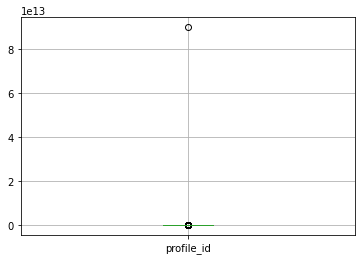

In [29]:
o_prof=find_outliers_IQR(data_profiles['profile_id'])
print('number of outliers of profile_id variable: '+ str(len(o_prof)))
print('max outlier value of profile_id variable: '+ str(o_prof.max()))
print('min outlier value of profile_id variable: '+ str(o_prof.min()))

data_profiles.boxplot(column=['profile_id'])

number of outliers of following variable: 370009
max outlier value of following variable: 4191080.0
min outlier value of following variable: 3399.0


<AxesSubplot:>

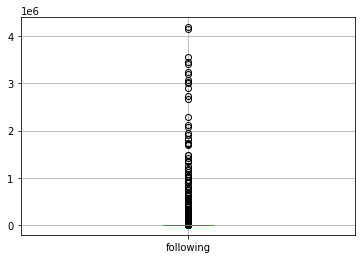

In [5]:
o_following=find_outliers_IQR(data_profiles['following'])
print('number of outliers of following variable: '+ str(len(o_following)))
print('max outlier value of following variable: '+ str(o_following.max()))
print('min outlier value of following variable: '+ str(o_following.min()))

data_profiles.boxplot(column=['following'])

number of outliers of followers variable: 385054
max outlier value of followers variable: 285457645.0
min outlier value of followers variable: 2197.0


<AxesSubplot:>

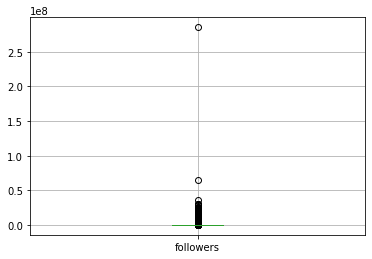

In [12]:
o_followers=find_outliers_IQR(data_profiles['followers'])
print('number of outliers of followers variable: '+ str(len(o_followers)))
print('max outlier value of followers variable: '+ str(o_followers.max()))
print('min outlier value of followers variable: '+ str(o_followers.min()))

data_profiles.boxplot(column=['followers'])

In [ ]:
o_posts=find_outliers_IQR(data_profiles['n_posts'])
print('number of outliers of n_posts variable: '+ str(len(o_posts)))
print('max outlier value of n_posts variable: '+ str(o_posts.max()))
print('min outlier value of n_posts variable: '+ str(o_posts.min()))

data_profiles.boxplot(column=['n_posts'])

After the analysis of outliers we are intrested of the missing values of the dataframe.

In [6]:
data_profiles.isnull()

,sid,profile_id,profile_name,firstname_lastname,description,following,followers,n_posts,url,cts,is_business_account
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,True,True,True,False,True
4,False,False,False,True,True,True,True,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
4509581,False,False,False,False,False,False,False,False,True,False,False
4509582,False,False,False,False,True,True,True,True,True,False,True
4509583,False,False,False,False,True,True,True,True,True,False,True
4509584,False,False,False,False,False,False,False,False,True,False,False


In [30]:
data_profiles.isnull().sum()

sid                          0
profile_id               32447
profile_name                 0
firstname_lastname      288465
description            2055996
following              1056815
followers              1056815
n_posts                1056815
url                    3639312
cts                     438488
is_business_account    1064263
dtype: int64

We obtain the number of missing values for each variable. We can also check the proportion of missing values for each column:

In [31]:
for column in data_profiles.columns:
    if data_profiles[column].isnull().sum() > 0:
        print(column, ': {:.2%}'.format(data_profiles[column].isnull().sum() /
                                               data_profiles[column].shape[0]))

profile_id : 0.72%
firstname_lastname : 6.40%
description : 45.59%
following : 23.43%
followers : 23.43%
n_posts : 23.43%
url : 80.70%
cts : 9.72%
is_business_account : 23.60%


Now we know that there are a lot of missing value and we have to decide what strategy adopt for them. First of all we produce a copy of our dataset in order to modify it. 

In [33]:
d_prof_c = data_profiles.copy()

For the qualitatives variables firstname_lastname, description, url and cts we have replaced the missing values with an empty string, beacuse we don't have information about it.

In [35]:
d_prof_c.firstname_lastname.fillna('', inplace=True)
d_prof_c.description.fillna('', inplace=True)
d_prof_c.url.fillna('', inplace=True)
d_prof_c.cts.fillna('', inplace=True)


For the variable is_business_account we can assume that they are False.

In [36]:
d_prof_c.is_business_account.fillna(False, inplace=True)
c=d_prof_c["is_business_account"].value_counts()


For the quantitative variables following, follower and n_posts between all the techniques we choose the imputation with an additional column that consists of replacing the missing values with the median value and adding an additional column that has the value False if it wasn't a null value and True otherwise. That's because we assume that if you have a profile on instragam you will follow at least 1 profile and viceversa so replace the missing value with 0 doesn't make sense. We choose that strategy also because deleting the rows will reduce our dataframe too much.

In [37]:
d_prof_c['FollowingIsMissing'] = d_prof_c['following'].isnull()
d_prof_c['FollowersIsMissing'] = d_prof_c['followers'].isnull()
d_prof_c['PostsIsMissing'] = d_prof_c['n_posts'].isnull()


In [38]:
d_prof_c['following']=d_prof_c['following'].fillna(d_prof_c['following'].median())
d_prof_c.FollowingIsMissing.head(100)

0     False
1     False
2     False
3      True
4      True
      ...  
95    False
96    False
97    False
98    False
99    False
Name: FollowingIsMissing, Length: 100, dtype: bool

In [39]:
d_prof_c['followers']=d_prof_c['followers'].fillna(d_prof_c['followers'].median())
d_prof_c.FollowersIsMissing.head(200)

0      False
1      False
2      False
3       True
4       True
       ...  
195    False
196    False
197    False
198    False
199    False
Name: FollowersIsMissing, Length: 200, dtype: bool

In [40]:
d_prof_c['n_posts']=d_prof_c['n_posts'].fillna(d_prof_c['n_posts'].median())
d_prof_c.PostsIsMissing.head(200)

0      False
1      False
2      False
3       True
4       True
       ...  
195    False
196    False
197    False
198    False
199    False
Name: PostsIsMissing, Length: 200, dtype: bool

The profile_id should be an identificator number for each profile so we may set it with a range of number between 0 and 4509586 as following. But we prefer to eliminate the null rows because we need the profile_id variable to communicate between our different dataframes. So we will eliminate the rows. 

l=list(range(0,4509586))
d_prof_c['profile_id']=l
d_prof_c.profile_id.head(100)

In [41]:
d_prof_c.dropna(subset=['profile_id'], inplace=True)

In [42]:
d_prof_c.isnull().sum()

sid                    0
profile_id             0
profile_name           0
firstname_lastname     0
description            0
following              0
followers              0
n_posts                0
url                    0
cts                    0
is_business_account    0
FollowingIsMissing     0
FollowersIsMissing     0
PostsIsMissing         0
dtype: int64

The next dataframe we want to analyze is instagram locations so we import it and as usual we study its main characteristics.

In [44]:
import pandas as pd
data_locations = pd.read_csv('instagram_locations.csv', delimiter='\t')

In [103]:
type(data_locations)

pandas.core.frame.DataFrame

In [144]:
data_locations.head()

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
0,719981,110296492939207,"Playa de Daimuz - Valencia, España",NaN,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,-0.139475,38.974391,daimuzplaya,playa-de-daimuz-valencia-espana,https://es.wikipedia.org/wiki/Daimuz,2019-05-29 01:21:29.987
1,719983,274391278,Nová Vieska,NaN,NaN,Nová Vieska,NaN,SK,NaN,True,...,Kis-Újfalu,kis-ujfalu,SK,Slovakia,18.466667,47.866667,NaN,nova-vieska,NaN,2019-05-29 01:21:38.037
2,719985,148885595789195,Everest Today,Himalayas,+977,"Kathmandu, Nepal",NaN,NP,NaN,False,...,Pasupati,pasupati,NP,Nepal,85.330150,27.701960,EverestToday,everest-today,NaN,2019-05-29 01:21:46.295
3,719987,263258277,BULAC - Bibliothèque universitaire des langues...,"65, rue des Grands-Moulins",75013,"Paris, France",NaN,FR,01 81 69 18 00,False,...,13ème Arrondissement Paris,13eme-arrondissement-paris,FR,France,2.375995,48.827240,BULAC.Paris,bulac-bibliotheque-universitaire-des-langues-e...,www.bulac.fr,2019-05-29 01:21:54.355
4,326443,406147529857708,ABC Cable Networks Group,3800 W Alameda Ave,91505,"Burbank, California",NaN,US,(818) 569-7500,False,...,NaN,NaN,NaN,NaN,-118.341864,34.153265,NaN,abc-cable-networks-group,NaN,2019-04-02 15:22:55.703


In [105]:
data_locations.tail()

,sid,id,name,street,zip,city,region,cd,phone,aj_exact_city_match,...,dir_city_name,dir_city_slug,dir_country_id,dir_country_name,lat,lng,primary_alias_on_fb,slug,website,cts
1022653,719973,873926439475785,Baby Season,Suarez de Figueroa # 380,NaN,"Santa Cruz de la Sierra, Bolivia",NaN,BO,69118383,False,...,Santa Cruz de la Sierra,santa-cruz-de-la-sierra,BO,Bolivia,-63.185307,-17.786130,babyseason.srl,baby-season,NaN,2019-05-29 01:20:57.078
1022654,719975,390707529,Cueva Carvajal,NaN,NaN,NaN,NaN,NaN,+52 81 2089 7776,NaN,...,NaN,NaN,NaN,NaN,-100.359619,25.653550,CuevaCarvajalBrewPub,cueva-carvajal,http://www.cuevacarvajal.mx,2019-05-29 01:21:04.434
1022655,719977,1205466612894741,The Cheesecake Factory,304 Orland Square Dr,60462,"Orland Park, Illinois",NaN,US,(708) 873-3747,False,...,Manor Homes,manor-homes,US,United States,-87.843649,41.618551,NaN,the-cheesecake-factory,http://locations.thecheesecakefactory.com/il/o...,2019-05-29 01:21:13.404
1022656,719979,286794844,Plimmer Towers,2 Gilmer Terrace,NaN,"Wellington, New Zealand",NaN,NZ,NaN,False,...,NaN,NaN,NaN,NaN,174.775000,-41.285800,NaN,plimmer-towers,NaN,2019-05-29 01:21:21.628
1022657,720678,554330673,Старые Бирюли,Северная улица,NaN,NaN,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,49.444430,55.979180,NaN,NaN,NaN,2019-05-29 02:07:00.772


In [106]:
data_locations.shape

(1022658, 23)

In [107]:
data_locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1022658 entries, 0 to 1022657
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   sid                     1022658 non-null  int64  
 1   id                      1022658 non-null  int64  
 2   name                    1022658 non-null  object 
 3   street                  715704 non-null   object 
 4   zip                     715579 non-null   object 
 5   city                    937166 non-null   object 
 6   region                  1760 non-null     object 
 7   cd                      939010 non-null   object 
 8   phone                   601688 non-null   object 
 9   aj_exact_city_match     1000510 non-null  object 
 10  aj_exact_country_match  1000510 non-null  object 
 11  blurb                   406705 non-null   object 
 12  dir_city_id             495698 non-null   object 
 13  dir_city_name           495698 non-null   object 
 14  di

In [22]:
data_locations.describe() #use info and describe function to obtain information about the dataset

,sid,id,lat,lng
count,1.022658e+06,1.022658e+06,1.016495e+06,1.016495e+06
mean,5.274856e+05,3.152851e+14,-1.529215e+01,3.421718e+01
std,2.994567e+05,5.795031e+14,7.615085e+01,2.201081e+01
min,1.000000e+00,7.000000e+00,-1.799830e+02,-9.000000e+01
25%,2.688392e+05,2.522377e+08,-8.015575e+01,2.997555e+01
50%,5.300405e+05,8.573350e+08,-2.450000e+00,4.067820e+01
75%,7.866598e+05,3.304662e+14,3.071740e+01,4.884722e+01
max,1.043657e+06,2.402148e+16,1.799941e+02,8.999870e+01


The dimension is 1022658 rows and 23 columns. Most of the variables are qualitative and the only quantitative are sid, id, lat, lng. 

<AxesSubplot:ylabel='Frequency'>

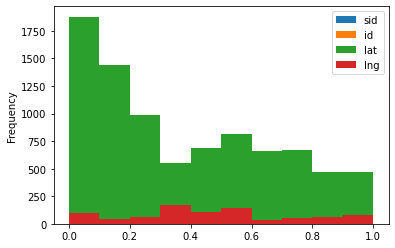

In [48]:
data_locations.plot.hist(range=[0,1])


We know that the values of latitude change in the range (90, -90) and the longitude values in the range(180, -180). So we want to check this condition.

In [2]:
len([index for index,value in enumerate(data_locations.lat) if value > 90 or value< -90])

295655

In [3]:
len([index for index,value in enumerate(data_locations.lng) if value > 180 or value< -180])

0

In [4]:
len([index for index,value in enumerate(data_locations.lat) if value > 180 or value< -180])

0

In [5]:
len([index for index,value in enumerate(data_locations.lng) if value > 90 or value< -90])

0

We notice that the conditions are not verified and this suppose the presence of an error in the collection of latitude and longitude data, so we have two alternatives: the first one is to eliminate the rows with strange values, bute they are 295655, so we prefer a second option.
We assume that the latitude values and the longitude values are inverted so we swap them in a copy of the dataframe otherwise we should eliminate all the rows with values higher then (90, -90) for the latitude variable.

In [53]:
d_loc_c=data_locations.copy()

In [ ]:
#d_loc_c.drop(d_loc_c[d_loc_c['lat'] > 90 or d_loc_c[d_loc_c['lat'] < -90].index, inplace = True)

In [54]:
d_loc_c.rename(columns={'lat': 'longitude', 'lng':'latitude'}, inplace=True)

In [55]:
d_loc_c.latitude.max()

89.998698

In [56]:
d_loc_c.latitude.min()

-90.0

In [57]:
d_loc_c.longitude.max()

179.994121

In [58]:
d_loc_c.longitude.min()

-179.983

We are working on the missing values:

In [60]:
for column in data_locations.columns:
    if data_locations[column].isnull().sum() > 0:
        print(column, ': {:.2%}'.format(data_locations[column].isnull().sum() /
                                               data_locations[column].shape[0]))

street : 30.02%
zip : 30.03%
city : 8.36%
region : 99.83%
cd : 8.18%
phone : 41.16%
aj_exact_city_match : 2.17%
aj_exact_country_match : 2.17%
blurb : 60.23%
dir_city_id : 51.53%
dir_city_name : 51.53%
dir_city_slug : 51.58%
dir_country_id : 51.54%
dir_country_name : 51.53%
lat : 0.60%
lng : 0.60%
primary_alias_on_fb : 58.39%
slug : 7.92%
website : 39.05%


In [54]:
data_locations.isnull().sum()

sid                             0
id                              0
name                            0
street                     306954
zip                        307079
city                        85492
region                    1020898
cd                          83648
phone                      420970
aj_exact_city_match         22148
aj_exact_country_match      22148
blurb                      615953
dir_city_id                526960
dir_city_name              526960
dir_city_slug              527437
dir_country_id             527030
dir_country_name           526960
lat                          6163
lng                          6163
primary_alias_on_fb        597127
slug                        80990
website                    399396
cts                             0
dtype: int64

As before for the qualitatives variables we choose to replace the NA values with an empty string.

In [61]:
d_loc_c.street.fillna('', inplace=True)
d_loc_c.zip.fillna('', inplace=True)
d_loc_c.city.fillna('', inplace=True)
d_loc_c.region.fillna('', inplace=True)
d_loc_c.cd.fillna('', inplace=True)
d_loc_c.phone.fillna('', inplace=True)
d_loc_c.aj_exact_city_match.fillna('', inplace=True)
d_loc_c.aj_exact_country_match.fillna('', inplace=True)
d_loc_c.blurb.fillna('', inplace=True)
d_loc_c.dir_city_id.fillna('', inplace=True)
d_loc_c.dir_city_name.fillna('', inplace=True)
d_loc_c.dir_city_slug.fillna('', inplace=True)
d_loc_c.dir_country_id.fillna('', inplace=True)
d_loc_c.dir_country_name.fillna('', inplace=True)
d_loc_c.primary_alias_on_fb.fillna('', inplace=True)
d_loc_c.slug.fillna('', inplace=True)
d_loc_c.website.fillna('', inplace=True)
d_loc_c.cts.fillna('', inplace=True)

For the latitude and longitude values we delete the rows with NA because if we inplace them with 0, that 0 will represent a specific point on the map and in the end we risk to have wrong locations.

In [62]:
d_loc_c.dropna(subset=['longitude','latitude'], inplace=True)

<AxesSubplot:ylabel='Frequency'>

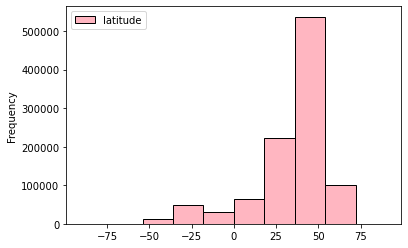

In [64]:
d_loc_c.latitude.plot.hist(edgecolor='black', color="lightpink", legend=True)

<AxesSubplot:ylabel='Frequency'>

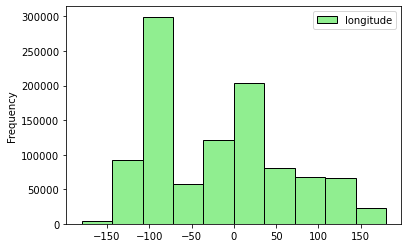

In [66]:
d_loc_c.longitude.plot.hist(edgecolor='black', color="lightgreen", legend=True)

In [67]:
d_loc_c.isnull().sum()

sid                       0
id                        0
name                      0
street                    0
zip                       0
city                      0
region                    0
cd                        0
phone                     0
aj_exact_city_match       0
aj_exact_country_match    0
blurb                     0
dir_city_id               0
dir_city_name             0
dir_city_slug             0
dir_country_id            0
dir_country_name          0
longitude                 0
latitude                  0
primary_alias_on_fb       0
slug                      0
website                   0
cts                       0
dtype: int64

In [51]:
d_loc_c.lat.max()

179.994121

For the instagram posts dataframe we have to use a different technique for read the file because of its dimention.
So we will estract the varible that we will need.

In [164]:
data_posts_sid = pd.read_csv('instagram_posts.csv', delimiter='\t', usecols=[ 'sid'])


In [165]:
data_posts_sid_profile = pd.read_csv('instagram_posts.csv', delimiter='\t', usecols=[ 'sid_profile'])


In [8]:
data_posts_post_id = pd.read_csv('instagram_posts.csv', delimiter='\t', usecols=[ 'post_id'])


In [12]:
print(data_posts_post_id.head())
print(data_posts_post_id.tail())
print(data_posts_post_id.isnull().sum())

       post_id
0  BXdjjUlgcgq
1  BVg0pbolYBC
2  BRgkjcXFp3Q
3  BKTKeNhjEA7
4   8-NQrvoYLX
              post_id
42710192  BcpWMWGBfxh
42710193  Ba6LZWwlCl8
42710194  BPN0kM1hYUw
42710195  BxsZ8nDBr-L
42710196  BgNJ4EzHQwQ
post_id    0
dtype: int64


In the EDA, we have shown the most appropriate methods for modifying datasets in order to clean them up and to make work easier. However, when we went to solve the research questions, we preferred to use the original dataset by extracting only the columns of interest for the question, when possible, and we then treated the individual columns to make the analysis faster and more efficient.

## **[RQ2] Let's explore the dataset by finding simple insights regarding the profile and posts.**







### **Plot the number of posts for each profile in descending order.**

In [4]:
profiles_n_posts = pd.read_csv('instagram_profiles.csv', sep = '\t', usecols=['profile_id','profile_name','n_posts'])
#sort values by the number of posts in descending order, after dropping NA values
profiles_n_posts_sorted=profiles_n_posts.dropna(subset=['n_posts']).sort_values(by="n_posts", ascending=False)
profiles_n_posts_sorted

,profile_id,profile_name,n_posts
3990313,1.996648e+08,jasem33312,183730.0
2571453,8.563367e+09,koenigpic,142428.0
4338921,1.273455e+09,rudyanto62,126340.0
3942129,9.813508e+06,hometown_ni,125220.0
4219642,1.607309e+09,dwfitfiber_thailand,117262.0
...,...,...,...
2402230,1.050933e+10,faith.dever,0.0
2402229,8.779595e+09,sugarsprinkledglitter,0.0
377966,8.618561e+08,hannahkraft13,0.0
2402225,4.117964e+09,4pf_cj_,0.0


As it is possible to see from this sorted table, there are some profiles which have a number of posts with a magnitude order of $10^5$, while in the tail it is evident that many profiles have zero posts that is actually plausible.

###  What posts have the highest number of _likes_?

In [74]:
#read only the columns of the files which contains the post id and and the number of likes
posts_n_of_like=pd.read_csv('instagram_posts.csv', sep='\t', usecols=['post_id','numbr_likes'])
#sort in descending order and return the first 10 rows after removing NA values
posts_n_of_like.dropna(subset=["numbr_likes"]).sort_values(by="numbr_likes", ascending=False).head(10)

,post_id,numbr_likes
19624085,Bt3yaXmAM0d,8822952.0
19623988,BuwffB7g8cK,5447066.0
19624082,Buc1gyZAaMQ,5116398.0
19623986,BvcukE8AMuG,4271466.0
39701024,BqSLFVBFLfq,4264745.0
6293907,BwTSXBKg7gN,3586546.0
19624086,Btw8pFXAvQm,3558599.0
19802016,BvC3n6_gqin,3533326.0
30850564,Bw7vqLrFkHi,3340297.0
39812576,Bw2gTH1AiDA,3311246.0


In this table it is possible to observe the post id of posts with the higher number of likes which has a magnitude order of $10^6$.

### What posts have the most and the least number of comments?

In [ ]:
#read only the columns of post with the post id and the number of comments
posts_n_of_comment=pd.read_csv('instagram_posts.csv', sep='\t', usecols=['post_id','number_comments'])

#filter only for the post id which have a significative number of posts(e.g. not equal to zero)
posts_n_of_comment=posts_n_of_comment[posts_n_of_comment["number_comments"]!=0]

#sort by number of comments in descending order after removing eventual NA values
posts_n_of_comments_sorted=posts_n_of_comment.dropna(subset=["number_comments"]).sort_values(by="number_comments", ascending=False)

In [95]:
#return the first ten rows to have the post with the most number of comments
posts_n_of_comments_sorted.head(10)

,post_id,number_comments
41873060,Bx2sPAjHviO,488953.0
12164781,BuGjhWAhAW5,313997.0
33261751,BJ-rkpTgn1N,257488.0
11149127,BMtisIxjhtT,214365.0
9383817,BzOOWj3DfZK,189888.0
5427268,BoQoM-JFkPA,180635.0
25257169,Bwarws1lCok,173988.0
6220011,Bt4qlVDAZMH,170836.0
31689573,Bs9NhQkAcJA,166919.0
14257307,Bzqb95QI_1E,166198.0


In [490]:
#return the last ten rows to show posts withthe least number of comments different from 0 (e.g. > 0)
posts_n_of_comments_sorted.tail(n=10)

,post_id,number_comments
17510513,BvLC0JAheeI,1.0
17510522,Bu-RNK6AIjw,1.0
17510528,Bujp9mfAJGb,1.0
33713319,BuZ153vgPc-,1.0
17510546,Bu2vLi5hkIr,1.0
17510553,Bl04rwkAtZx,1.0
17510557,BlQ9YL7gdBH,1.0
17510559,BlQtw_-g2R4,1.0
17510562,Bs8W7IDlcQa,1.0
1,BVg0pbolYBC,1.0


The number of comments is lower than the number of likes that is obvious since a like is a more immediate reaction than a comment.

### How many posts include tagged locations, and how many do not? Show it using an appropriate chart and comment your results.

In [180]:
#read only the column with the location id
posts_locations=pd.read_csv('instagram_posts.csv', sep='\t', usecols=['profile_id', 'location_id' ])
#calculate the percentage of posts with location over the total by considering the number of rows in which there are not NA
posts_with_location=posts_locations['location_id'].notnull().values.sum()/posts_locations.shape[0]*100
#repeat for posts without location as the numers of rows with NA values over the total
posts_without_location=posts_locations['location_id'].isnull().values.sum()/posts_locations.shape[0]*100

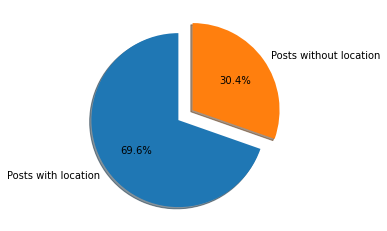

In [146]:
#plot a pie chart with the proportion
labels=('Posts with location', "Posts without location")
sizes=[posts_with_location, posts_without_location]
explode=(0.1, 0.1)
pie_chart=plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90) 
plt.show()

According to this analysis users tend to add locations to their posts in the around 70% of the cases probably due to the fact that in this way they could let their followers know where they are without explicitely stating it in the post caption. Moreover if the profile is public, adding locations will give more exposure on instagram and this could be useful for example for business purposes, in particular in the case of a business account.

### How many posts include only photos? How many also have videos?

In [107]:
#read only the column with posts type
posts_type=pd.read_csv('instagram_posts.csv', sep='\t', usecols=['post_type'])

In [109]:
#filter for the posts which contains only photo and print the shape of the column (number of rows)
print("The number of posts including only photos is: ", posts_type[posts_type["post_type"]==1].shape[0])

The number of posts including only photos is:  41534486


In [110]:
#filter for the posts which are multy-type and print the shape of the column
print("The number of posts including also video is: ", posts_type[posts_type["post_type"]==3].shape[0])

The number of posts including also video is:  40943


### What's the percentage of business accounts vs non-business? What can you interpret regarding that percentage?

In [112]:
#read only the column which indicates if the account is business or not
profiles_business=pd.read_csv('instagram_profiles.csv', sep = '\t', usecols=['is_business_account'])

In [147]:
#return the proportion of business accounts on the total (business accounts/total dimension of the column), considering the NA values as False
print("The percentage of business accounts is:", round((profiles_business.loc[:,"is_business_account"]==True).sum()/(profiles_business.shape[0])*100, 2),"%")

The percentage of business accounts is: 18.97 %


In [119]:
#repeat operation removing NA not considering NA as False
print("The percentage of business accounts is:", round((profiles_business.loc[:,"is_business_account"]==True).sum()/(profiles_business.dropna().shape[0])*100, 2), "%")

The percentage of business accounts is: 24.82 %


## **[RQ3] Now it's important to understand the most common times in which users publish their posts**

### What is the most common time in which users publish their posts?

To answer to this question we can use the Counter from the package 'collection' of Python. Thanks to the Counter and its function 'update()', we can simply iterate through the posts, dividing the file in chunks and extracting only the columns useful for this exercise (and for the 6.2), for a better efficiency. 

In [71]:
#initialize a counter for the times of the posts
c = Counter()

#divide in chunks the file
for chunk in tqdm(pd.read_csv('~/Documents/Data_Science/ADM/homeworks/instagram_posts.csv', delimiter = '\t', chunksize = 250000, usecols = ['cts', 'numbr_likes', 'number_comments'], 
                              parse_dates=['cts'], date_parser=pd.to_datetime)):
    #update the counter with the times of the posts in the current chunk
    chunk.dropna(subset=['cts'], inplace = True)
    chunk_times = [t.time() for t in chunk.cts]
    c.update(chunk_times)
    
print("The most common time in which users publish their posts is:", c.most_common(1)[0][0] )

171it [05:19,  1.87s/it]

The most common time in which users publish their posts is: 21:00:09


We can slightly modify the code to obtain the most common time in which users publish their posts, considerign a precision to the minute or to the hour.

In [ ]:
#or to be precised at the minute and not at the second:
#initialize a counter for the times of the posts
c2 = Counter()

#divide in chunks the file
for chunk in tqdm(pd.read_csv('~/Documents/Data_Science/ADM/homeworks/instagram_posts.csv', delimiter = '\t', chunksize = 250000, 
                              usecols = ['cts', 'numbr_likes', 'number_comments'], parse_dates=['cts'], date_parser=pd.to_datetime)):
    #update the counter with the times of the posts in the current chunk
    chunk_times = [t.time().isoformat(timespec = 'minutes') for t in chunk.cts if not pd.isnull(t)]
    c2.update(chunk_times)
    
print("The most common time in which users publish their posts is:", c2.most_common(1)[0][0] )


171it [05:43,  2.01s/it]

The most common time in which users publish their posts is: 18:00


In [ ]:
#also the case of the precision at the hour:
#initialize a counter for the times of the posts
c3 = Counter()

#divide in chunks the file
for chunk in tqdm(pd.read_csv('~/Documents/Data_Science/ADM/homeworks/instagram_posts.csv', delimiter = '\t', chunksize = 250000, 
                              usecols = ['cts', 'numbr_likes', 'number_comments'], parse_dates=['cts'], date_parser=pd.to_datetime)):
    #update the counter with the times of the posts in the current chunk
    chunk_times = [t.time().isoformat(timespec = 'hours') for t in chunk.cts if not pd.isnull(t)]
    c2.update(chunk_times)

print("The most common time in which users publish their posts is:", c2.most_common(1)[0][0] )

171it [05:34,  1.95s/it]

The most common time in which users publish their posts is: 19


The results are different from each other, but we can see how the interval of time is always the late afternoon/evening. This result makes sense because that is the time when people disconnect from work or have finished studying.

### Create a function that receives a time intervals list as a parameter and returns a plot with the number of posts for each given interval.

In [72]:
def plot_interval_posts(intervals, counter):
    '''
    Function that takes in input 
    - a list of time intervals  
    - a Counter providing the number of posts of every possible time (among the ones in the file) 
    Returns the number of posts between each one of the time intervals
    '''
    #initialize the output array
    val = np.zeros(len(intervals), dtype = np.int32)

    #for every value in the Counter, check in which interval is comprehended
    for ti in counter:
        for interval, i in zip(intervals, range(7)):
            if ti >= interval[0] and ti <= interval[1]:
                val[i] += counter[ti]
                break
    return val

### Use the function that you created in the previous literal to plot the number of posts between the following time intervals:<br>
Initial time | Final Time
------------ | ----------
06:00:00      | 10:59:59
11:00:00      | 13:59:59
14:00:00      | 16:59:59
17:00:00      | 19:59:59
20:00:00      | 23:59:59
00:00:00      | 02:59:59
03:00:00      | 05:59:59


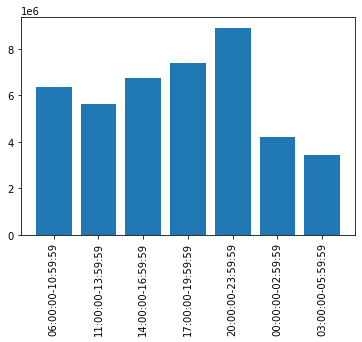

In [73]:
#define the time intervals
intervals = [(datetime.time(6,0,0), datetime.time(10,59,59)), (datetime.time(11,0,0), datetime.time(13,59,59)), 
             (datetime.time(14,0,0), datetime.time(16,59,59)), (datetime.time(17,0,0), datetime.time(19,59,59)),
            (datetime.time(20,0,0), datetime.time(23,59,59)),(datetime.time(0,0,0), datetime.time(2,59,59)), (datetime.time(3,0,0), datetime.time(5,59,59))]

#plot
plt.bar(np.array([str(interval[0]) + '-'+str(interval[1]) for interval in intervals]),plot_interval_posts(intervals, c))
plt.xticks(rotation=90)
plt.show()

Though this histogram we have the confirm of the results obtained in the first question of the RQ3 block.



## **[RQ4] In most cases, we will not have a consistent dataset, and the one we are dealing with is not an exception (ex. in the given datasets, you may not find the information of the profiles for some of the posts). So let’s enhance our analysis.**



### Write a function that, given a profile_id, will be able to return the posts that belong to the given profile_id.

In [249]:
post = pd.read_csv('instagram_posts.csv', sep='\t', usecols = ['profile_id','location_id','numbr_likes','number_comments','post_type','post_id','description']) 

In [34]:
def post_extraction(profile_id, df):
    ''' profile_id : profile_id in which we are interested have the post
    df : dataframe of profile
    the function return the post id for the choosen user while print no post for the user in the case inside 
    the database there is not any user with that profile_id'''
    if df.loc[df['profile_id'] ==profile_id ].shape[0] >=1:
        return df.loc[df['profile_id'] ==profile_id ]['post_id'].values
    else:
        return None

In [319]:
post_extraction(profile['profile_id'][2], post)

array(['BtgBr-hHXez', 'Bs04k58nGY6', 'BzBbR1YAU81', 'By_mhIkAyyY',
       'Bx95gbegM7R', 'BxrrTRmhtlt', 'BxPfAzeHn7Q', 'BvoQOd7Hr5Q',
       'BvU4ZuAnZdy', 'BvIFGeGnpTf', 'BuxD55_nB5A', 'Bt5rpNfnBkp'],
      dtype=object)

### Write another function that, given an input n (an integer), will return the posts that belong to the n top posted profiles (top n profiles that have posted the highest number of posts) that their data is available in the profile.csv using the previously written function.

In [367]:
def post_n_top_posted(n):
    ''' n is the number of the user that you want to see which have posted more'''
    lista = []
    top_10_profile_per_posts_profile_name = list(profile.sort_values(by = 'n_posts', ascending = False).reset_index(drop=True).loc[:n-1]['profile_name'].values)
    top_10_profile_per_posts_profile_id = list(profile.sort_values(by = 'n_posts', ascending = False).reset_index(drop=True).loc[:n-1]['profile_id'].values)
    for i,j in zip(top_10_profile_per_posts_profile_id, top_10_profile_per_posts_profile_name):
        lista.append([post_extraction(i,post),j,i])
    return lista
#the function returns a list with the post id, the username and the profile id of the n top posted profiles

In [368]:
#try the post_n_top_posted function
post_n_top_posted(3) 

[[array(['Bq3hP3Khp8J', 'Bq3hN53hUsD', 'BCqCe9LypeF', '20Wu4zypd2',
         'BrKq76AhadU', 'Bq_MjFzB_Wt', 'Bq_MiKhhP05', 'BpQ2cmKF-W0',
         '3V4OeXypTT', 'BzUmjr2pgni', 'BzUmictJSO1', 'BzUmhW0pjrN',
         'BzUmgscJEK4', 'BzUmgBYJzoS', 'BzUmfZspDqA', 'BzUmejDptYx',
         'BzUmdnupYxW', 'BzUmcZRpTTn', 'BzScUjhJiwK', 'BzRkojLJBMQ',
         'BzRkmb3JXea'], dtype=object),
  'jasem33312',
  199664772.0],
 [array(['BxJpvMrpl0n', 'BxJpeX2pXeN', 'BxJptNSpk6g', 'BxJpzW4J6Aq',
         'BxJpgQMJa66', 'BxJp2qgpVJo', 'BxJpxSLp4rB', 'BxJpcZ0JRqN',
         'BxJp4i3pArJ', 'BxJpq3dppxY', 'BxJp6dVJvtO', 'BxJposzpeA7',
         'BxJpmohpwK2', 'BxJpkrrJ0b3', 'BxJpijSJd_f'], dtype=object),
  'koenigpic',
  8563366588.0],
 [array(['BpfufadAl1f', 'Bz6mD1VpaJB', 'BuCyAT8Abu3', 'BxD_1nXgoBG',
         'BvYZl1yAubo', 'BrkhuwcATjv', 'BwMTtZ5g4RY', 'Brt9v5VATSp',
         'Bx7F9xKJCN2', 'BvNCnhMgdAl', 'ByBp307pDMh', 'ByPPM0Mps4a',
         'ByPPFlhJrbA', 'Bz7fTyVpLLQ', 'Bz7a1vgJzl2', 'Bz6mutIJCHA',


### What is the average number of "likes" and comments of the top 10 profiles with the highest number of posts which their information is available in profile.csv?

In [378]:
lista = post_n_top_posted(10) #call post_n_top_posted with n=10
for i in range(len(lista)):
    print('__________')
    print('For user', lista[i][1]) #lista[1] profile_name
    print('Number of likes:', post[post['profile_id']==lista[i][2]]['numbr_likes'].mean()) #lista[2] profile_id
    print('Number of comments:', post[post['profile_id']==lista[i][2]]['number_comments'].mean())

__________
For user jasem33312
Number of likes: 7.666666666666667
Number of comments: 0.0
__________
For user koenigpic
Number of likes: 0.0
Number of comments: 0.0
__________
For user rudyanto62
Number of likes: 2.96
Number of comments: 0.04
__________
For user hometown_ni
Number of likes: 0.2962962962962963
Number of comments: 0.0
__________
For user dwfitfiber_thailand
Number of likes: 1.5405405405405406
Number of comments: 0.0
__________
For user waxking911
Number of likes: 2.026315789473684
Number of comments: 0.18421052631578946
__________
For user gamt_official
Number of likes: 6.477611940298507
Number of comments: 0.04477611940298507
__________
For user collarosedw_official
Number of likes: 0.4
Number of comments: 0.04
__________
For user gamt_authentic
Number of likes: 3.921875
Number of comments: 0.0
__________
For user ivankkkka.trmp
Number of likes: nan
Number of comments: nan


  
   
### Plot the number of posts that these top 10 profiles have sent on Instagram in the given interval in question RQ3. Interpret the resulting chart.

In [256]:
#read only the columns with profile_id and cts
post_time = pd.read_csv('instagram_posts.csv', sep='\t', usecols = ['profile_id','cts'])

In [257]:
#merge to extract from the post dataset only the rows associated to the top 10 users in terms of n_posts
top_10_n_posts=profiles_n_posts_sorted[:10] #use the sorted profile dataset generated for RQ2
input_counter=top_10_n_posts.merge(post_time, on='profile_id', how='left')

In [280]:
#drop NA values
input_counter_without_na=input_counter.dropna()

In [281]:
#convert the cts column to datetime.time
input_counter_to_datetime=pd.to_datetime(list(input_counter_without_na['cts'])).time

In [282]:
#create a counter
c_top_10=Counter(input_counter_to_datetime)

Then we used the same function created for RQ3.

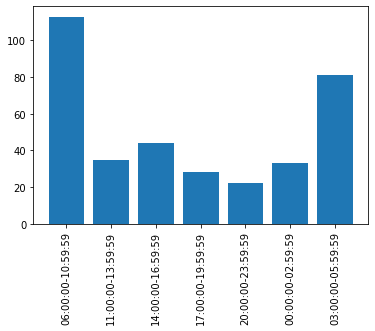

In [283]:
def plot_interval_posts(intervals, counter):
    '''
    Function that takes in input 
    - a list of time intervals  
    - a Counter providing the number of posts of every possible time (among the ones in the file) 
    Returns the number of posts between each one of the time intervals
    '''
    #initialize the output array
    val = np.zeros(len(intervals), dtype = 'int32')
    #err = 0
    #for every value in the Counter, check in which interval is comprehended
    for ti in counter:
        for interval, i in zip(intervals, range(7)):
            if ti >= interval[0] and ti <= interval[1]:
                val[i] += counter[ti]
                break
            #err+=1
    #print(err)
    return val

#define the time intervals
intervals = [(datetime.time(6,0,0), datetime.time(10,59,59)), (datetime.time(11,0,0), datetime.time(13,59,59)), 
             (datetime.time(14,0,0), datetime.time(16,59,59)), (datetime.time(17,0,0), datetime.time(19,59,59)),
            (datetime.time(20,0,0), datetime.time(23,59,59)),(datetime.time(0,0,0), datetime.time(2,59,59)), (datetime.time(3,0,0), datetime.time(5,59,59))]

#plot
plt.bar(np.array([str(interval[0]) + '-'+str(interval[1]) for interval in intervals]),plot_interval_posts(intervals, c_top_10 ))
plt.xticks(rotation=90)
plt.show()


In this plot we can observe that the intervals most present for the top 10 users are 6 to 11 am and 3 to 6 am. The first interval is predictable since applying the same function to the whole dataset it turned out to be one of the most frequent ones regarding the publication of posts. The second one is a bit strange because we do not tend to expect a user to publish during the night but at the same time since we are analyzing a small number of posts compared to the total it is probably due to the presence of a user who tends to publish at that time. Further analysis filtering by users would allow us to clarify wheter this could be the reason or it's due to randomness. Similarly, at intermediate times we do not observe as high a posting rate as the plot obtained on the total dataset in the sense that there are few posts at peak times.

## [RQ5] The most influential users are the ones with the highest number of “followers", you can now look more into their activity.


### Plot the top 10 most popular users in terms of followers and their number of posts.



In [362]:
profile = pd.read_csv('instagram_profiles.csv',sep='\t',
                      usecols = ['sid', 'profile_id','profile_name','followers','n_posts'])
profile.head(1)

,sid,profile_id,profile_name,followers,n_posts
0,4184446,4721049632.0,jphillip033,146.0,170.0


In [16]:
profile_top_10=profile.sort_values(by='followers', ascending=False)[:10] #take only the first ten lines of the sorted dataset
profile_top_10[['profile_name','n_posts']]

,profile_name,n_posts
2880218,instagram,5760.0
2582507,victoriassecret,7355.0
3820939,nba,28816.0
701965,louisvuitton,3352.0
2414951,buzzfeedtasty,2791.0
2785241,andresiniesta8,990.0
333193,hm,4566.0
3934581,princessyahrini,4719.0
1311970,danbilzerian,1311.0
1703764,akshaykumar,1173.0


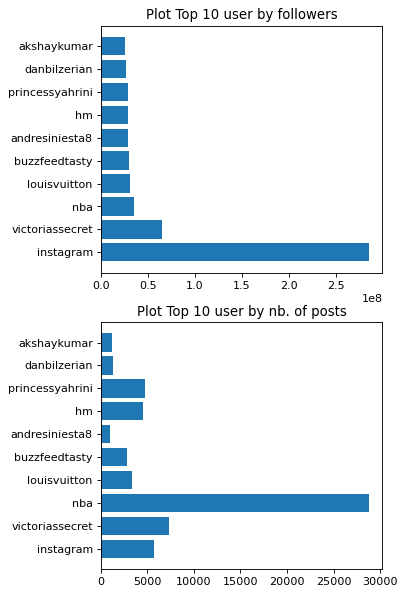

In [17]:
fig = plt.figure(figsize=(10, 9), dpi=80)
ax = fig.add_subplot(221)
plt.title('Plot Top 10 user by followers')
plot_followers=plt.barh(profile_top_10['profile_name'], profile_top_10['followers'])
ax = fig.add_subplot(223)
plt.title('Plot Top 10 user by nb. of posts')
plot_posts=plt.barh(profile_top_10['profile_name'],profile_top_10['n_posts'])
plt.show()

### Who is the most influential user?


As the question mentioned if we consider the number of followers, **Instagram** seems to be the most influential one but the situation could change when we consider the number of posts, in this case the **nba** account looks the most influential one. 

### Have they posted anything with tagged locations? Extract the most frequent areas on their posts and plot the number of times each city has been visited

In [86]:
profile_top_10.reset_index(inplace = True, drop = True)
# now we search for the post with location
post = pd.read_csv('instagram_posts.csv', sep='\t', usecols = ['profile_id','location_id','numbr_likes','number_comments','post_type']) 

In [107]:
top_10_df = profile_top_10.merge(post, on ='profile_id', how='inner')
#in this datset we have only the post with location made by the 10 top user
top_10_df

,sid,profile_id,profile_name,followers,n_posts,location_id,post_type,numbr_likes,number_comments
0,336492,25025320.0,instagram,285457645.0,5760.0,5.332856e+06,1,125428.0,1240.0
1,336492,25025320.0,instagram,285457645.0,5760.0,5.873874e+08,1,669786.0,4818.0
2,336492,25025320.0,instagram,285457645.0,5760.0,8.770667e+14,1,1914299.0,20065.0
3,336492,25025320.0,instagram,285457645.0,5760.0,3.500213e+08,1,840588.0,3627.0
4,336492,25025320.0,instagram,285457645.0,5760.0,5.243120e+08,1,385494.0,5664.0
...,...,...,...,...,...,...,...,...,...
136,3513205,907025384.0,akshaykumar,26252169.0,1173.0,NaN,1,241543.0,1152.0
137,3513205,907025384.0,akshaykumar,26252169.0,1173.0,NaN,1,797506.0,2733.0
138,3513205,907025384.0,akshaykumar,26252169.0,1173.0,NaN,1,921671.0,9349.0
139,3513205,907025384.0,akshaykumar,26252169.0,1173.0,NaN,1,1402087.0,16180.0


Now we do the same things in order to have the city name for each location_id (when the information is available).

In [133]:
location = pd.read_csv( 'instagram_locations.csv', sep='\t', usecols = ['id','name','lat','lng'])

In [134]:
top_10_df_location  = top_10_df.dropna(subset='location_id').groupby(['profile_id','location_id']).count().reset_index()
top_10_df_location = top_10_df_location[['profile_id','location_id','sid']].rename(columns ={'sid':'count_location'})
top_10_df_location = top_10_df_location.sort_values(by='count_location', ascending=False).reset_index(drop=True)
top_10_df_location = top_10_df_location.merge(profile_top_10[['profile_id','profile_name']], how='left')
top_10_df_location = top_10_df_location.merge(location.rename(columns ={'id':'location_id','name':'post_place_name'}), how='left')

In [164]:
top_10_df_location[:10]

,profile_id,location_id,count_location,profile_name,post_place_name,lat,lng
0,24239929.0,2.130118e+08,9,princessyahrini,"Sydney, Australia",151.207970,-33.867510
1,496865116.0,3.669021e+08,3,andresiniesta8,"Kobe-shi, Hyogo, Japan",135.191300,34.696400
2,24239929.0,1.906910e+15,2,princessyahrini,"Bora Bora, French Polynesia",-151.751991,-16.505823
3,50417061.0,1.731498e+15,2,danbilzerian,Bel-Air Estate,-118.454550,34.089880
4,20824486.0,1.027474e+09,2,nba,Wells Fargo Center,-75.171187,39.901452
5,3416684.0,2.626063e+08,1,victoriassecret,666 Fifth Avenue,-73.976204,40.760163
6,25025320.0,3.500213e+08,1,instagram,Parkland County,-114.006000,53.530000
7,25025320.0,1.011689e+09,1,instagram,Leuser Ecosystem,96.847161,3.743398
8,25025320.0,8.385239e+08,1,instagram,Stanislaus National Forest,-121.291619,38.139407
9,25025320.0,7.113485e+08,1,instagram,Hadleigh Park,0.595682,51.551175


The most frequent location results to be Sidney(Australia), tagged by the account of **princessyahrini**, while the second one is Kobe-shi(Japan) tagged by **andresiniesta8**. Then we have some locations tagged two times and others only one time. It's evident that **instagram** changed location in every published post, while **princessyahrini** published some posts with the same location. We can suppose that users could have tagged a location when they visited a new place and they wanted to show it to their followers.

### How many pictures-only posts have they published? How many reels? (only videos) and how many with both contents? Provide the number as percentages and interpret those figures.

In [23]:
for i in top_10_df['profile_name'].unique():
    print('_______________')
    print(i)
    print('The number of photo :',top_10_df[(top_10_df['profile_name']==i) & (top_10_df['post_type']==1)].shape[0])
    print('Video:',top_10_df[(top_10_df['profile_name']==i) & (top_10_df['post_type']==2)].shape[0])
print('\n With mixed type there are not any posts')

_______________
instagram
The number of photo : 31
Video: 3
_______________
victoriassecret
The number of photo : 5
Video: 2
_______________
nba
The number of photo : 13
Video: 5
_______________
louisvuitton
The number of photo : 1
Video: 0
_______________
buzzfeedtasty
The number of photo : 13
Video: 0
_______________
andresiniesta8
The number of photo : 12
Video: 0
_______________
hm
The number of photo : 2
Video: 0
_______________
princessyahrini
The number of photo : 23
Video: 3
_______________
danbilzerian
The number of photo : 15
Video: 0
_______________
akshaykumar
The number of photo : 13
Video: 0

 With mixed type there are not any posts


The number of posts of the top 10 users which are only photo is: 91 %
The number of posts of the top 10 users which are only video is: 9 %


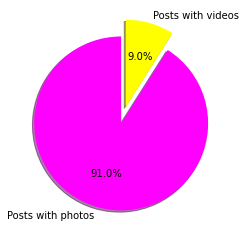

In [162]:
#calculate the percentage of posts with only photos and only videos
n_photo=round(top_10_df[top_10_df['post_type']==1].shape[0]/top_10_df['post_type'].value_counts().sum()*100)
n_video=round(top_10_df[top_10_df['post_type']==2].shape[0]/top_10_df['post_type'].value_counts().sum()*100)

print('The number of posts of the top 10 users which are only photo is:', n_photo, '%')
print('The number of posts of the top 10 users which are only video is:', n_video, '%')

#plot in a pie chart the percentage of photos and videos
labels=('Posts with photos', "Posts with videos")
sizes=[n_photo, n_video]
explode=(0.1, 0.1)
colors=['magenta', 'yellow']
pie_chart=plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=colors) 
plt.show()


### How many "likes" and comments did posts with only pictures receive? How about videos and mixed posts? 


In [179]:
print('Sum of likes for photo:', int(top_10_df[top_10_df['post_type']==1]['numbr_likes'].sum()) )
print('Sum of comments for photo:', int(top_10_df[top_10_df['post_type']==1]['number_comments'].sum()) )
top_10_df[top_10_df['post_type']==1][['numbr_likes','number_comments']].describe()
# where the count below represent the number of post that contains only pitcures

Sum of likes for photo: 69285634
Sum of comments for photo: 497013


,numbr_likes,number_comments
count,128.0,128.0
mean,541294.015625,3882.9140625
std,502641.388938992167823,4830.2742052670682824
min,20749.0,0.0
25%,105708.75,507.75
50%,294018.0,2260.5
75%,926834.5,5461.0
max,2331497.0,24621.0


In [180]:
print('Sum of likes for videos:', int(top_10_df[top_10_df['post_type']==2]['numbr_likes'].sum()) )
print('Sum of comments for videos:', int(top_10_df[top_10_df['post_type']==2]['number_comments'].sum()) )
top_10_df[top_10_df['post_type']==2][['numbr_likes','number_comments']].describe()
# where the count below represent the number of post that contains only videos

Sum of likes for videos: 3464814
Sum of comments for videos: 26258


,numbr_likes,number_comments
count,13.0,13.0
mean,266524.15384615387301892,2019.8461538461538112
std,213533.16002744794241153,2290.24055673029852187
min,35689.0,323.0
25%,157695.0,529.0
50%,198356.0,868.0
75%,331442.0,2929.0
max,749724.0,6714.0


In [184]:
print('We do not have any value or any statistics for mixed type posts')
top_10_df[top_10_df['post_type']==3][['numbr_likes','number_comments']]

We do not have any value or any statistics for mixed type posts


,numbr_likes,number_comments


#### Try to provide the average numbers and confront them with their followers amount, explaining what you can say from that comparison.

In [219]:
top_10_df

,sid,profile_id,profile_name,followers,n_posts,location_id,post_type,numbr_likes,number_comments
0,336492,25025320.0,instagram,285457645.0,5760.0,5332856.0,1,125428.0,1240.0
1,336492,25025320.0,instagram,285457645.0,5760.0,587387369.0,1,669786.0,4818.0
2,336492,25025320.0,instagram,285457645.0,5760.0,877066659067597.0,1,1914299.0,20065.0
3,336492,25025320.0,instagram,285457645.0,5760.0,350021298.0,1,840588.0,3627.0
4,336492,25025320.0,instagram,285457645.0,5760.0,524311966.0,1,385494.0,5664.0
...,...,...,...,...,...,...,...,...,...
136,3513205,907025384.0,akshaykumar,26252169.0,1173.0,NaN,1,241543.0,1152.0
137,3513205,907025384.0,akshaykumar,26252169.0,1173.0,NaN,1,797506.0,2733.0
138,3513205,907025384.0,akshaykumar,26252169.0,1173.0,NaN,1,921671.0,9349.0
139,3513205,907025384.0,akshaykumar,26252169.0,1173.0,NaN,1,1402087.0,16180.0


In [216]:
top_10_groupby_df = top_10_df.groupby('profile_name').sum().reset_index() #reset index on order to scan by index with the for loop

In [229]:
top_10_groupby_df #with groupby the dataset is grouped by the profile name and then the sum function is applied

,profile_name,sid,profile_id,followers,n_posts,location_id,post_type,numbr_likes,number_comments
0,akshaykumar,45671665,11791329992.0,26252169.0,15249.0,1653066228336077.0,13,13352324.0,85572.0
1,andresiniesta8,41247528,5962381392.0,29542143.0,11880.0,2019566475639570.0,12,5676272.0,26845.0
2,buzzfeedtasty,3800667,27631587074.0,30246783.0,36283.0,284407070.0,13,1311218.0,12521.0
3,danbilzerian,7622100,756255915.0,26476004.0,19665.0,3462999176842407.0,15,12946699.0,128921.0
4,hm,317380,46820160.0,29176804.0,9132.0,613921984.0,2,162427.0,730.0
5,instagram,11440728,850860880.0,285457645.0,195840.0,3359947015132448.0,37,29864166.0,225050.0
6,louisvuitton,330376,187619120.0,30689316.0,3352.0,5590714.0,1,186857.0,867.0
7,nba,6067746,374840748.0,35339708.0,518688.0,1531514066974584.0,23,4185542.0,19276.0
8,princessyahrini,93994004,630238154.0,29042823.0,122694.0,5819194325758728.0,29,3388378.0,20131.0
9,victoriassecret,2599898,23916788.0,65269440.0,51485.0,3852820710127985.0,9,1676565.0,3358.0


Summing after groupby is ok for the number of likes and comments which is associated to each post while is not good for the number of followers which is linked instead to each profile.
Due to that in top_10_groupby_df the number of followers cannot be used since it was obtained summing the correct one for each occurence of the profile_name. 
To obtain the correct one we decided to groupby after dropping duplicates and retrieve the number of followers associated to each row in the for loop.

In [21]:
top_10_df_duplicates=top_10_df.drop_duplicates(subset='profile_name').reset_index(drop=True).groupby('profile_name').sum()
top_10_df_duplicates #reset index to carry out the for loop in an easier way

,sid,profile_id,followers,n_posts,location_id,post_type,numbr_likes,number_comments
profile_name,,,,,,,,
akshaykumar,3513205,9.070254e+08,26252169.0,1173.0,1.653066e+15,1,382877.0,654.0
andresiniesta8,3437294,4.968651e+08,29542143.0,990.0,1.793700e+05,1,604503.0,3222.0
buzzfeedtasty,292359,2.125507e+09,30246783.0,2791.0,0.000000e+00,1,77185.0,504.0
danbilzerian,508140,5.041706e+07,26476004.0,1311.0,2.222444e+08,1,266200.0,3290.0
hm,158690,2.341008e+07,29176804.0,4566.0,3.846191e+08,1,116059.0,642.0
instagram,336492,2.502532e+07,285457645.0,5760.0,5.332856e+06,1,125428.0,1240.0
louisvuitton,330376,1.876191e+08,30689316.0,3352.0,5.590714e+06,1,186857.0,867.0
nba,337097,2.082449e+07,35339708.0,28816.0,6.294880e+05,1,164521.0,1415.0
princessyahrini,3615154,2.423993e+07,29042823.0,4719.0,6.451783e+08,1,55212.0,699.0


In [22]:
for i in top_10_groupby_df.index:
    print('__________')
    print(top_10_groupby_df['profile_name'][i])
    likes_i = top_10_groupby_df['numbr_likes'][i]
    comments_i = top_10_groupby_df['number_comments'][i]
    followers_i = top_10_df_duplicates['followers'][i] #retrieve the number of followers from the dropped datset
    print('Proportion of likes respect to followers:', likes_i/followers_i*100,'%')
    print('Proportion of comments respect to followers:', comments_i/followers_i*100,'%')
print('\n With mixed type there are not any posts')

__________
akshaykumar
Proportion of likes respect to followers: 50.8617935531346 %
Proportion of comments respect to followers: 0.3259616376841091 %
__________
andresiniesta8
Proportion of likes respect to followers: 19.214151119639492 %
Proportion of comments respect to followers: 0.09087018500993649 %
__________
buzzfeedtasty
Proportion of likes respect to followers: 4.335065980405255 %
Proportion of comments respect to followers: 0.0413961378967145 %
__________
danbilzerian
Proportion of likes respect to followers: 48.899747106851926 %
Proportion of comments respect to followers: 0.48693526409801113 %
__________
hm
Proportion of likes respect to followers: 0.5566990819145236 %
Proportion of comments respect to followers: 0.0025019875377714435 %
__________
instagram
Proportion of likes respect to followers: 10.461855383133985 %
Proportion of comments respect to followers: 0.07883831592599315 %
__________
louisvuitton
Proportion of likes respect to followers: 0.608866616642743 %
Prop

## [RQ6] It's time to get information from the user posting effectiveness.

### What is the average time (days and minutes) a user lets pass before publishing another post? Plot the top 3 users that publish posts more frequently (calculate the average time that passes between posts), including their amount of followers and following. Provide insights from that chart.

To give an answer to these questions (and to some of the next questions, in particular of the bonus points) it could be useful to map *profile_id*s to the posts of the profile (as a DataFrame object, including only the columns of interest). This is, computationally speaking, an heavy operation; for this reason we computed it only once and then we stored it as a binary file in order to be able to only load the file (which contains the dict). To do so, we used the pickle package.

In [2]:
import pickle

In [6]:
profiles = pd.read_csv('~/Documents/Data_Science/ADM/homeworks/instagram_profiles.csv', delimiter = '\t', 
                                  usecols=['profile_id', 'following', 'followers', 'profile_name'])
profiles.profile_id.dropna(inplace=True)

In [78]:
def profiles_to_posts(profiles):
    '''
    Function that return a dict() object that maps every profile_id with its posts
    '''
    #initialize an empty list
    l = []

    #read the file 'instagram_posts' in chunks
    for chunk in tqdm(pd.read_csv('~/Documents/Data_Science/ADM/homeworks/instagram_posts.csv', delimiter = '\t', 
                                  usecols=['profile_id', 'cts', 'location_id', 'numbr_likes', 'number_comments'], chunksize = 250000, parse_dates=['cts'], date_parser=pd.to_datetime)):
        chunk.dropna(subset = ['cts', 'profile_id'], inplace=True)
        l.append(profiles.merge(chunk, on = 'profile_id', how = 'inner'))
    
    #create the dataframe
    pro_to_posts = pd.concat(l)
    
    return pro_to_posts

In [80]:
#code that computes and save the Dataframe in a file
pro_to_posts = profiles_to_posts(profiles)
with open("profiles_to_posts.dat", "wb") as file:
    pickle.dump(pro_to_posts, file)

In [128]:
#initialize a dictionary that maps each profile_id to its average time
averages = dict()

#initialize the global average with the first average time of the first user that has at least 2 posts
for pro_id, p_posts in pro_to_posts:
    if len(p_posts) > 1:
        global_average = (max(p_posts.cts) - min(p_posts.cts)) / (len(p_posts) - 1)
        break

for pro_id, p_posts in pro_to_posts:
    if len(p_posts) > 1:
        averages[pro_id] = (max(p_posts.cts) - min(p_posts.cts)) / (len(p_posts) - 1)
        global_average = (global_average + averages[pro_id]) / 2
        
print('The average time a user lets pass before publishing another post is:', global_average)

The average time a user lets pass before publishing another post is: 16 days 14:13:39.238841055


In [129]:
with open("averages.dat", "wb") as file_avg:
    pickle.dump(averages, file_avg)

In [3]:
#code that retrieves the DataFrame from the file
with open("profiles_to_posts.dat", "rb") as file:
    pro_to_posts = pickle.load(file)
    
with open("averages.dat", "rb") as file_avg:
    averages = pickle.load(file_avg)

At this point we have the datas that we were talking about, so we can proceed with the answers to the questions.

In [4]:
#sort the average times in descending order
sorted_averages = sorted(averages.items(), key=lambda x:x[1])

In [24]:
#print the 3 more "active" profiles
i = 1
j = 0
while i < 4:
    #select the profile
    user = profiles.loc[profiles['profile_id'] == sorted_averages[j][0]]
    j += 1 
    #skip the profiles for which we don't have info about followers and following
    if np.isnan(user.followers.values[0]) or np.isnan(user.following.values[0]):
        continue
    if i == 1: pos = '-st'
    elif i == 2: pos = '-nd'
    elif i == 3: pos = '-rd'
    print('The', i, pos, 'user to post more frequently is', user.profile_name.values[0], 'and has', user.followers.values[0], 'followers and', user.following.values[0], 'following.' )
    i += 1

The 1 -st user to post more frequently is elvinabril and has 1569.0 followers and 738.0 following.
The 2 -nd user to post more frequently is alex_dinsdale and has 705.0 followers and 1572.0 following.
The 3 -rd user to post more frequently is kkyros and has 1560.0 followers and 1094.0 following.


### Using the function you previously coded, plot the time intervals with the highest average number of “likes” and the ones with the highest average number of comments on posts.

/var/folders/_2/4hw_b5r17l139bnw2649h6yc0000gn/T/ipykernel_74203/952755035.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post.dropna(subset=['numbr_likes', 'number_comments'], inplace = True)


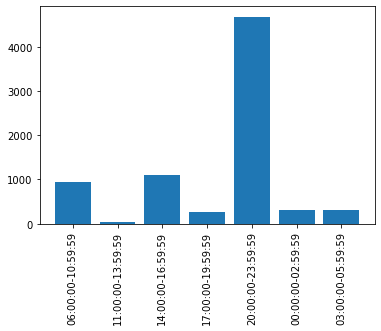

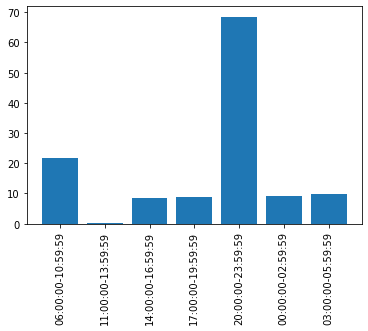

In [24]:
def plot_likes_and_comments(intervals):
    '''
    Function that takes in input 
    - a list of time intervals  
    - a Counter providing the number of posts of every possible time (among the ones in the file) 
    Returns the number of posts between each one of the time intervals
    '''
    post = pro_to_posts.obj[['cts', 'numbr_likes', 'number_comments']]
    post.dropna(subset=['numbr_likes', 'number_comments'], inplace = True)
    #initialize the output arrays
    likes = np.empty(len(intervals))
    comments = np.empty(len(intervals))
    #for every post, check in which interval is comprehended
    for time, like, comment in zip(post.cts, post.numbr_likes, post.number_comments):
        time = time.time()
        for i, interval in enumerate(intervals):
            if time >= interval[0] and time <= interval[1]:
                try:
                    likes[i] = (likes[i] + like) / 2
                    comments[i] = (comments[i] + comment) / 2
                except:
                    likes[i] = like
                    comments[i] = comment
                break
                
    return (likes, comments)
#define the time intervals
intervals = [(datetime.time(6,0,0), datetime.time(10,59,59)), (datetime.time(11,0,0), datetime.time(13,59,59)), 
             (datetime.time(14,0,0), datetime.time(16,59,59)), (datetime.time(17,0,0), datetime.time(19,59,59)),
            (datetime.time(20,0,0), datetime.time(23,59,59)),(datetime.time(0,0,0), datetime.time(2,59,59)), (datetime.time(3,0,0), datetime.time(5,59,59))]

likes, comments = plot_likes_and_comments(intervals)

#plot likes
plt.bar(np.array([str(interval[0]) + '-'+str(interval[1]) for interval in intervals]),likes)
plt.xticks(rotation=90)
plt.show()

#plot comments
plt.bar(np.array([str(interval[0]) + '-'+str(interval[1]) for interval in intervals]),comments)
plt.xticks(rotation=90)
plt.show()

The result makes sense because the intervals with the highest average of likes and comments coincides with the one in which people post more.

## [RQ7] Of course, calculating probabilities is a job that any Data Scientist must know. So let's compute some engaging figures.

### What's the probability that a post receives more than 20% "likes" of the number of followers a user has?

We are intrested in the probability that a post receives more than 20% "likes" of the number of followers a user has.
So we extract from the posts dataframe only the column that are useful for our study: profile_id and numbr_likes.
From profiles dataframe: profile_id works as the key, since in this way our datas can be used in different dataframes but they refers to the same profiles and followers.
After this we deleted NA values and merged the two dataframes.
We have  created a new coloum with the ratio between favorable cases and possible cases that are above 20 %. But it was a True/False array so with values_counts pandas function, using the attribute normalize=True we obtained that the percentage is 15.86 %.

In [ ]:
data_posts_sid_likes= pd.read_csv('/content/instagram_posts.csv', delimiter='\t', usecols=['profile_id', 'numbr_likes'])

In [ ]:
data_profiles_sid_likes=pd.read_csv('/content/instagram_profiles.csv', delimiter='\t', usecols=['profile_id', 'followers'])

In [ ]:
data_posts_sid_likes.dropna( inplace=True)

In [ ]:
data_profiles_sid_likes.dropna( inplace=True)

In [ ]:
posts_profiles = pd.merge(data_posts_sid_likes, data_profiles_sid_likes, how = 'inner', on = 'profile_id')

In [ ]:
posts_profiles['20perc'] = posts_profiles['numbr_likes']/posts_profiles['followers'] >= 0.2

In [ ]:
rel = posts_profiles['20perc'].value_counts(normalize = True)
print(rel*100)

False    84.131752
True     15.868248
Name: 20perc, dtype: float64


### Do users usually return to locations? Extract the probability that a user returns to a site after having posted it in the past. Does that probability make sense to you? Explain why or why not.

Now we are asked to extract the probability that a user returns to a site after having posted there in the past.
As before we consider from posts dataframe only profile_id and location_id coloumns. As always we delete the NA values.

In [3]:
import pandas as pd
data_posts_profile_location= pd.read_csv('instagram_posts.csv', delimiter='\t', usecols=['profile_id', 'location_id'])

In [4]:
data_posts_profile_location.dropna( subset=['profile_id', 'location_id'], inplace=True)
print(data_posts_profile_location)

            profile_id   location_id
0         2.237948e+09  1.022366e+15
1         5.579335e+09  4.574268e+14
2         3.134296e+08  4.574268e+14
3         1.837593e+09  4.574268e+14
4         1.131527e+09  4.574268e+14
...                ...           ...
42710192  5.556457e+09  4.574268e+14
42710193  3.371865e+08  4.574268e+14
42710194  3.289886e+09  4.574268e+14
42710195  8.536366e+09  4.267235e+06
42710196  2.219100e+09  4.574268e+14

[28625055 rows x 2 columns]


In [5]:
#We have grouped by the profile_id so for each one of them we have all the locations of them posts.
group=data_posts_profile_location.groupby('profile_id')

In [6]:
#After that we created a loop where the output is a True/False list if the locations id was greater than 1 and viceversa.
for profiles, location in group:
    l=[j for j in location.location_id.value_counts() if j>1]


In [8]:
#We convert our list in a series so we can now apply values_counts attributes and have the following result:
c=pd.Series(l, dtype='float64')
(c.value_counts(normalize=True))*100

Series([], dtype: float64)

So the probability that a profile come back in the same place is 14,04%. 
This probability is quite low if we expect that people should publish posts with the same location for example in the same day, or locations near to where they live or furthermore locations linked to their business purposes, but we must take into account as supposed in RQ5 that people tend to add locations when they visit new places and they want to share the novelty with their followers and probably they tend not to realize a content or tag the location when they come back to places of routine. So this could be one of the possible explanations of this low value.

## [RQ8] Every decision you take in a data-based environment should be reinforced with charts, statistical tests and analysis methods to check whether a hypothesis is correct or not.

### Does more “likes” also mean more comments? Plot a scatter plot of “likes” vs comments for posts.

In [141]:
data_numbr_likes_comm=pd.read_csv('instagram_posts.csv', delimiter='\t', usecols=['numbr_likes', 'number_comments'])

In [17]:
data_numbr_likes_comm.dropna(subset=['numbr_likes', 'number_comments'], inplace=True)

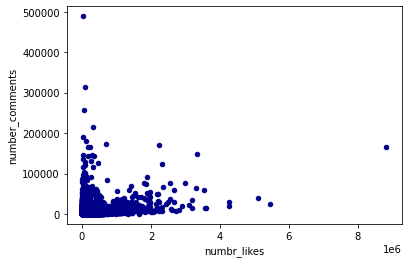

In [18]:
data_numbr_likes_comm.plot.scatter(x='numbr_likes', y='number_comments', c='DarkBlue')

Through scatterplots we can analyze the linear reletionship between two variables, in particular correlation. On x axis we find the number oflikes, while on the y axis the number of comments. From this representation it's evident that when the number of likes increases, the number of comments is not so far from zero and doesn't increase in the same way of the first variable. It happens also for the number of comments, since when the values are higher the number of likes doesn't increase so much. So it is not possible to underline an actual significant relation between these two.


### Can you find any significant relationship between the time a user publishes a post and the number of comments and “likes”? Use an appropriate statistical test or technique and support your choice.

To answer to this question we can simply exploit the two lists likes and comments of the RQ6. These list were the average of likes and comments for each time interval.

A statistical test that we can use is one-way ANOVA.

In the null hypothesis H0, we have that the means are equal: μ1 = μ2 = μ3 = … = μk 
In the null hypothesis H0 at least one mean differs from the others.

In [25]:
from scipy.stats import f_oneway

In [26]:
f_oneway(likes,comments)

F_onewayResult(statistic=3.043049205780961, pvalue=0.1066164033701431)

The p value is greater than 0.05 so we know that we don't refuse the null hypothesis and so we know that the comments  means and the likes means in specific intervals of times are the same.

### What’s the distribution of followers? Plot the empirical distribution of followers amongst all users and extract the mean, mode, and quantiles. Interpret those figures.


In [142]:
data_profiles_followers = pd.read_csv('instagram_profiles.csv', delimiter='\t', usecols=['followers'])

In [143]:
dp_followers=data_profiles_followers.copy()

In [144]:
dp_followers['followers']=dp_followers['followers'].fillna(dp_followers['followers'].median())

<AxesSubplot:title={'center':'Histogram of Followers'}, ylabel='Frequency'>

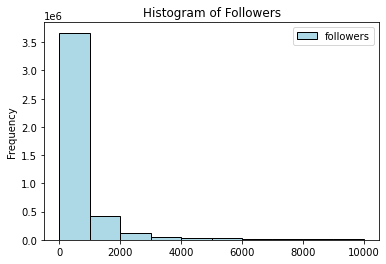

In [145]:
dp_followers.plot.hist(range=[0,10000], edgecolor='black',color="lightblue", legend=True, title='Histogram of Followers')

In [146]:
def ecdf(x):
  x = x / np.sum(x)
  return np.cumsum(x)

ECDF=ecdf(dp_followers)

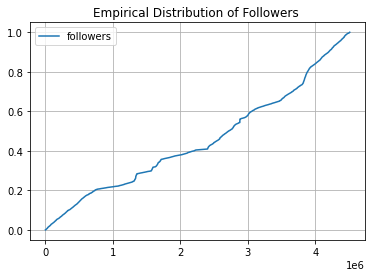

In [147]:
ECDF.plot(title='Empirical Distribution of Followers ')
plt.grid()

In [148]:
followers_sorted=dp_followers.sort_values(by='followers' , ascending=True)

In [149]:
followers_sorted.mode()

,followers
0,406.0


The mode is 0.

In [150]:
dp_followers.mean()

followers    3724.256134
dtype: float64

The mean is 3724.256134.

In [151]:
dp_followers.quantile(q=0.25)
dp_followers.quantile()
dp_followers.quantile(q=0.75)

followers    729.0
Name: 0.75, dtype: float64

This is the first quantile: 221.0

This is the second quantile: 406.0

This is the third quantile: 729.0

### What are histograms, bar plots, scatterplots and pie charts used for?


Histograms, bar plots, scatterplots and pie charts are ways of visualizing data.
In particular the histogram shows a frequency distribution of variables in a data set and it is used when the variable taken into consideration is a quantitative one. It's an easy way to display our datas into vertical bars erected over discrete intervals, usually combined, where on the x axis we find the range of values (known as class or bins) that indicates the number of observations. The histogram is different from the bar plot for different reasons. First, the bar plot refers to qualitative variables while the histogram to quantitative ones. Moreover the bar plot is used to realize comparisons between categories of data. A bar plot could be both horizontal and vertical and in one axis we will find categories while on the other one the number of values of the corresponding category. Another visualization type that is used for qualitative variables is the pie chart. This rappresentation usually shows the percentage of the parts of the whole variable. Pie charts are best used as a basic two-dimensional because otherwise we could have optic illusions about proportions.
Finally we have the scatterplot, a special type of chart that indicates the correlation between two numeric variables. It's the set of values of individual data points that helps us to understand wheter the relation between these two variables is positive or negative, strong or weak, linear or nonlinear. More in details, if the correlation is positive the points will follow an increasiing line, while viceversa if the correlation is negative the line will decrease. If the relation is strong then the points will be really close to each other, otherwise the relation will be a weak one. We coul also meet a non linear correlation tha we find when for example the points are distributed like a parable. In the case there is not an actual correlation the points will appear to be distributed all over the plane without e very specific shape.

### What insights can you extract from a Box Plot?

The boxplot is a very useful chart, since it is a standardized way of displaying the distribution of data based on a five number summary (minimum, first quartile, median, third quartile and maximum). It looks like a box with an horizontal line in it. That line represent the median or the second quantile while the lines which delimit the ends of the box represent the first and the third quantile. 
Outside the box  two more lines: the maximum and the minimum values respectively. Any points above or below these are to be considered outliers which belongs to data points that differs significantly from the other observations.

## **Bonus points**

### Sort the users in terms of number of followers and divide them into two groups: for the first group, take only the top 10% regarding "followers", and for the second one, take the rest. Now compare the mean of time intervals between posts for the two categories. Do you notice something relevant?

In [103]:
#sort the users by the number of followers
ordered_profiles = profiles[profiles['followers'].notna()].sort_values(by='followers', ascending = False)

In [104]:
#calculate how many is the 10%
ten_perc = len(ordered_profiles) // 10 

top_profiles = ordered_profiles.head(ten_perc)
other_profiles = ordered_profiles.tail(len(ordered_profiles) - ten_perc)

In [133]:
averages_copy = averages.copy()

top_average = averages_copy[top_profiles.head(1).profile_id.values[0]]

for profile in top_profiles.profile_id:
    try:
        top_average = (top_average + averages_copy[profile]) / 2
        del averages_copy[profile]
    except:
        pass
print('The average time a user of the first group lets pass before publishing another post is:', top_average)

The average time a user of the first group lets pass before publishing another post is: 31 days 09:42:18.211083594


In [135]:
other_average = averages_copy[other_profiles.head(1).profile_id.values[0]]
for avg in averages_copy.values():
    other_average = (other_average + avg) / 2
print('The average time a user of the second group lets pass before publishing another post is:', other_average)

The average time a user of the second group lets pass before publishing another post is: 16 days 14:13:39.238841055


We can notice how people with more followers tend to post less. We can also notice how the average time of the 'non-top' profiles coincides with the general average time. Top profiles are a sort of outliers.

###  Assume users publish their posts the same day pictures or videos are taken: Are there users that have visited the same location on the same day? How about the same week? Extract the results and explain them.

In [50]:
#version with multithreading:

import threading
import _thread

# Declaring a lock
lock = threading.Lock()

#initialize a counter for the days and one for the weeks
count_day = 0
count_week = 0

#initialize an iterator through the groups
group_iter = iter(pro_to_posts)

#Function for the thread
def update_counter(tot):
    global count_day
    global count_week
    global group_iter
    global count
    
    while count<tot:
        pro_id, p_posts = next(group_iter)
        #consider only locations and cts (not null)
        p_posts = p_posts[['cts', 'location_id']]
        p_posts.dropna(subset=['location_id'], inplace = True)
    
        #create a column for the date and one for the week number
        p_posts['date'] = pd.to_datetime(p_posts['cts']).dt.date
        p_posts['week'] = p_posts.date.apply(lambda x: x.isocalendar().week)
    
        #find if the user has returned to one location in the same date
        if len(p_posts[['location_id', 'date']].drop_duplicates()) < len(p_posts):
            lock.acquire()
            count_day += 1
            lock.release()
        
        #find if the user has returned to one location in the same week
        if len(p_posts[['location_id', 'week']].drop_duplicates()) < len(p_posts):
            lock.acquire()
            count_week += 1
            lock.release()
        lock.acquire()
        count += 1
        lock.release()
    return 


#initialize 6 threads
count = 0
tot = 1000000 #len(pro_to_posts)
t1 = threading.Thread(target=update_counter, args=[tot])
t2 = threading.Thread(target=update_counter, args=[tot])
t3 = threading.Thread(target=update_counter, args=[tot])
t4 = threading.Thread(target=update_counter, args=[tot])
t5 = threading.Thread(target=update_counter, args=[tot])
t6 = threading.Thread(target=update_counter, args=[tot])
#start the threads
t1.start()
t2.start()
t3.start()
t4.start()
t5.start()
t6.start()
#wait for the results of the threads
t1.join()
t2.join()
t3.join()
t4.join()
t5.join()
t6.join()

print('The number of users that returned to the same place on the same day is:', count_day, '->', count_day*100 / tot, '%.')
print('The number of users that returned to the same place on the same week is:', count_week, '->', count_week*100 / tot, '%.')

Exception in thread Exception in thread Thread-72:
Traceback (most recent call last):
  File "/Users/smndrs/opt/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
Thread-73Exception in thread :
Traceback (most recent call last):
  File "/Users/smndrs/opt/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    Exception in thread self.run()
  File "/Users/smndrs/opt/anaconda3/lib/python3.9/threading.py", line 910, in run
Thread-75:
Traceback (most recent call last):
  File "/Users/smndrs/opt/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
Exception in thread Thread-74Thread-76:
Traceback (most recent call last):
  File "/Users/smndrs/opt/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
:
Traceback (most recent call last):
  File "/Users/smndrs/opt/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self._target(*self._args, **self._kwargs)
  File "/var/folders/_2/4hw_b5r17l139bnw2649h6yc0000

The number of users that returned to the same place on the same day is: 184080 -> 18.408 %.
The number of users that returned to the same place on the same week is: 332896 -> 33.2896 %.


### Implement a text data analysis (also known as text mining) of the field "description" from instagram_posts.csv for descriptions written in English. Use appropriate visualizations and statistics to highlight the words (and probably the topics) provided for the users in that field.

Regarding the last question, to find the most common topics in the field "description" we need to import some new packages.
The package *nltk* is an helpful package for the tokenization and stemming of a text and also for the removing of stopwords. While *english_words* is a dictionary that contains all the english words (without punctuation). 

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from english_words import english_words_set

In [ ]:
pip install english-words
nltk.download('stopwords')
nltk.download('punkt')

Now we can proceed with the code. The algorithm that we implemented returns a Counter that counts the occurrencies of each word in the descriptions. By taking the 10 most common words we can have an idea of the 20 most common topics. To do so, we first tokenize each description, the word_tokenize() function divides each piece of the string (also punctuation and emojis). Then we applicate the stemmer to find the root of every word. At this point we can control if the words are present in the english dictionary, during this transiction we manage to eliminate all the non english words, punctuation and emojis. The last step is the one in which we eliminate also the stopwords (otherwise they would appear as the most common words).

In [4]:
#initialize a Counter for the frequencies of the topics
freq = Counter()

#initialize the set of stopwords and the stemmer
stopset = set(stopwords.words('english'))
stemmer = SnowballStemmer(language="english")

#iterate only on a part of the dataset
i=0

#iterate on the posts in chunks
for chunk in tqdm(pd.read_csv('~/instagram_posts.csv', usecols = ['description'], delimiter='\t', chunksize = 100000)):
    
    if i >= 50:
        break
    
    #iterate on all the not null description
    chunk.dropna(subset=['description'], inplace= True)
    
    for desc in chunk.description:
        
        #divide the description in tokens
        tokens = word_tokenize(desc)
        
        #stem the words
        stemmed = [stemmer.stem(t) for t in tokens]
        
        #take only the english words
        english_words = []
        for t in stemmed:
            if t.lower() in english_words_set:
                english_words.append(t)
        
        #remove stopwords
        topics = [word for word in english_words if not word in stopset and len(word)>2]
        
        #update the Counter
        freq.update(topics)
        
    i += 1
        
print(freq.most_common(20))

50it [34:34, 41.50s/it]

[('love', 311359), ('day', 234791), ('time', 154272), ('one', 149746), ('get', 148717), ('thank', 141295), ('like', 136378), ('today', 133768), ('new', 128777), ('come', 114835), ('friend', 109552), ('good', 104695), ('year', 103765), ('see', 102993), ('make', 100823), ('work', 98839), ('look', 98094), ('travel', 97831), ('life', 96360), ('great', 94555)]


The result might be not consistent because we only considered 5000000 posts (of the 42000000 total), so like 1/8 of the dataset. By the way from the 20 most common topics we can see how they are related to positive feelings and verbs of action, furthermore very recurrent is the topic of the day/year/today. So, we can say that people post on Instagram updates on their lives, mainly on what they did of positive / productive.

## Command line question

### Using the instagram_posts.csv, retrieve the first ten posts with descriptions longer than 100 characters and output the profiles that posted them. (Please keep in mind that the profile associated with some of those posts may not be found in the profiles. You can simply output User was not found! for those posts.)

Below you can find the copy of what is contained in the source code in the repository.

The output is in the image below.

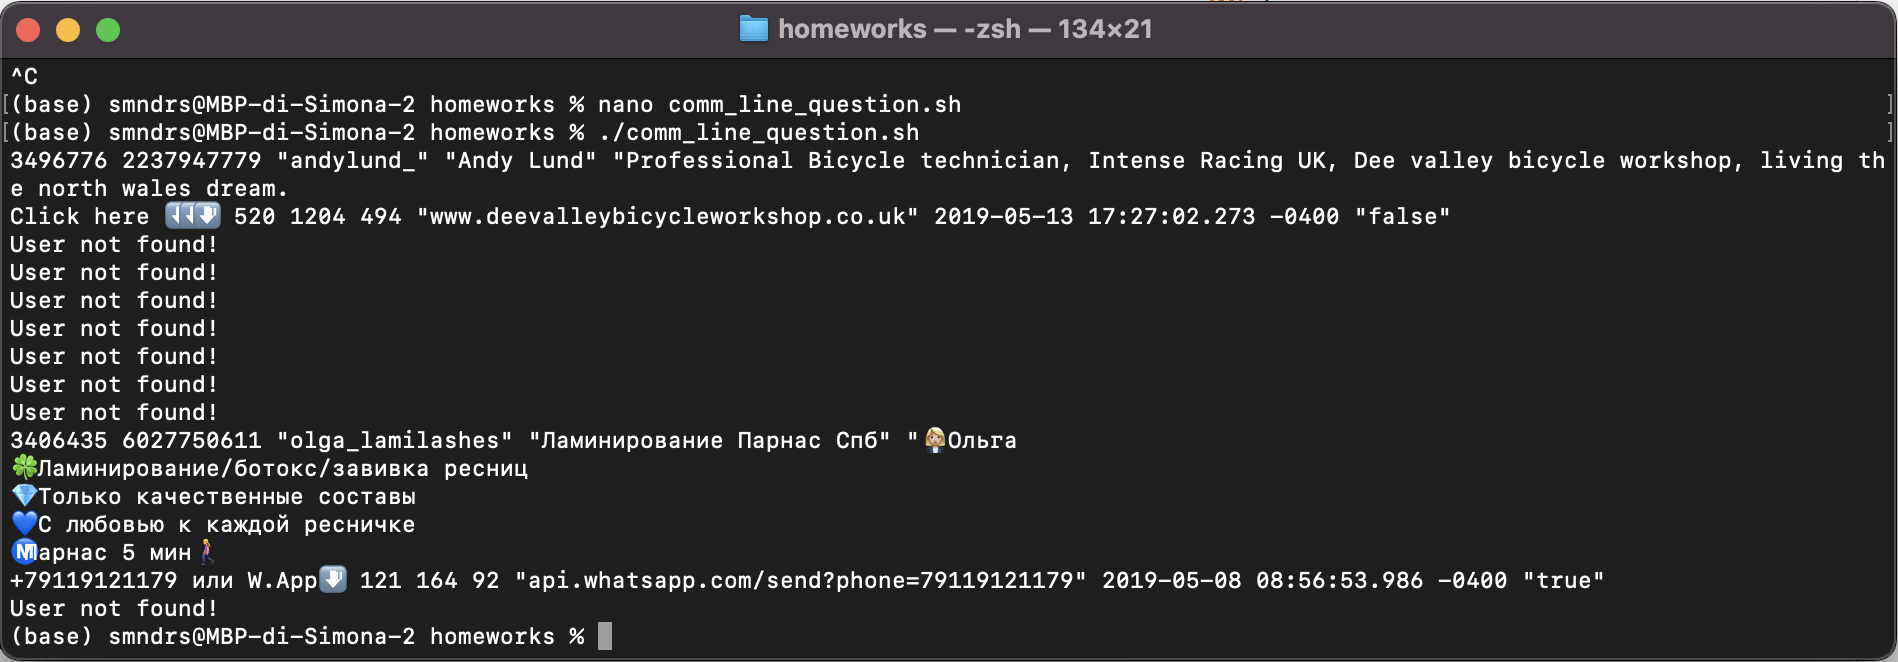

Let's explain the code. First of all we used two iterators, one for counting the actual descriptions longer than 100 characters (READ) and the other to iterate though the dataset(ITER). Until the 10 descriptions aren't found we proceed in this way:
1. We save the n-th row in a temporary file called line
2. We extract the field of the description
3. If the length of the description is > 100, we extract also the profile
4. If the profile is found in the instagram_profile.csv dataset, we print all the corresponding row, otherwise we print that the user wasn't found.
5. We increment by one the variable READ if and only if the description was greater than 100 character
6. In every case we increment by 1 the ITER variable, and we delete the "line" file.

## [AQ1] Given the following pseudocode, answer the questions:

### What is the output of this algorithm? Describe the mechanism of the algorithm in detail . We do not want to know only its final result. (Describe one example on your own)

The output of this algorithm is the printing of all the possible permutations of the N elements of the string. <br>
Let's see the mechanims in more details. First of all we have two functions: f1 that prints the sequence in input, and f2 that 'mixes' the elements of the list. The f2 function is the one more complex that's worth further explanations with an example.<br>
Let's suppose that we have the sequence l = [a, b, c]. 
- 1-st call to f2: *f2(abc, 1, 3)*. 0!=3, we go in the for loop from 1 to 3. 
- i=1, start=1: We switch the first element with the i-th element (this very first iteration will switch 'a' with 'a').
     - then we call recursively f2, *f2(abc, 2, 3)*. One more time 2!=3, so we go in the for loop this time from 2 to 3.
     - i=2, start=2: switch 'b' with 'b'
         - Call *f2(abc, 3, 3)*. This time we print the sequence that is [a, b, c].
     - (still i =2 and start = 2), switch 'b' with 'b'
     - i=3, start=2: switch 'b' with 'c'. Now the sequence is a, c, b
         - Call *f2(acb, 3, 3)*. This time we print the sequence that is [a, c, b]. 
     - (still i =3 and start = 2), switch 'c' with 'b'. Now the sequence is a, b, c
- i=2, start=1: We switch 'a' with 'b'. Sequence is now b, a, c
    - then we call recursively f2, *f2(bac, 2, 3)*. 2!=3, so we go in the for loop from 2 to 3.
     - i=2, start=2: switch 'a' with 'a'
         - Call *f2(bac, 3, 3)*. This time we print the sequence that is [b, a, c].
     - (still i =2 and start = 2), switch 'a' with 'a'
     - i=3, start=2: switch 'a' with 'c'
         - Call *f2(bca, 3, 3)*. This time we print the sequence that is [b, c, a]. 
     - (still i =3 and start = 2), switch 'c' with 'a'. Now the sequence is b, a, c
- i=3, start=1: We switch 'b' with 'c'. Sequence is now c, a, b
    - then we call recursively f2, *f2(cab, 2, 3)*. 2!=3, so we go in the for loop from 2 to 3.
     - i=2, start=2: switch 'b' with 'b'
         - Call *f2(cba, 3, 3)*. This time we print the sequence that is [c, a, b].
     - (still i =2 and start = 2), switch 'a' with 'a'
     - i=3, start=2: switch 'a' with 'b'
         - Call *f2(cba, 3, 3)*. This time we print the sequence that is [c, b, a]. 
     - (still i =3 and start = 2), switch 'a' with 'b'. Now the sequence is c, b, a
     
To conlude, the algorithm has recursively switched the elements of the sequence (practically it fixates the firtsts letters and then switches the others and prints the results).

### What is asymptotically (i.e., we are asking for big-O complexity) the algorithm's running time as a function of N?

We can say that the running time for an input of length n is $O(n \ n!)$.<br>
This is because at first we'll do $n$ calls to the f2 function, for each of them we'll call f2 $n-1$ times. All this $n \ (n-1)$ calls will do $n-2$ calls and  so on. It's evident how this is equal to $n!$. Meanwhile the f1 has simply to iterate on the sequence (only "full" sequences of length n will be inputs of f1), so its complexity is $O(n)$. If we put together the fact that each of the n! sequences produced by the  f2 function is to be printed, we can conclude that the complexity of the algorithm is $O(n \ n!)$

### Is this algorithm the optimal one to produce this output? If not, can you suggest a better algorithm to perform the same task?

We think that this algorithm is the optimal one. In fact we know that the number of permutations of n elements is *n!*, so it's impossible to not do n! iterations, furthermore it costs *n* to print a string. We can conclude that the optimal algorithm to produce all the permutations of a string has a big-O complexity $O(n \ n!)$

### [AQ2] Considering the following problem, answer the questions:
Alex has a ribbon of length N. He wants to cut the ribbon in a way that fulfils the following three conditions:

- Each piece of the cut should have an integer length
- He should at least cut the ribbon once
- The multiplication of the length of all the pieces be the maximum possible

#### Implement a recursive algorithm to help Alex find the maximum possible value after multiplying the length of the pieces. Explain your algorithm in detail.

In [2]:
import numpy as np


def calc_mult(n, cuts):
    mult = 1
    if len(cuts) == 1:
        return 0
    for i in range(len(cuts)-1, -1, -1):
        mult = mult * (n - cuts[i])
        n = cuts[i]
    return mult
    

def ribbon(n, cuts, mass):
    if len(cuts) >= n-1:
        return calc_mult(n, cuts)
    for i in range(cuts[-1] + 1, n):
        mass= max(calc_mult(n, cuts), ribbon(n, np.append(cuts, i), mass))
    return mass

cuts = np.zeros(1, dtype=np.int32) 
n = input('Insert an integer value')
ribbon(n, cuts, 0)

We initialized a numpy array to [0] (the choice was made only to avoid TypeError exceptions).
The ribbon function takes in input the length (of the ribbon) n, the array cuts and the maximum value at that point.
Cuts contains all the position in which the cut is to make, so its values will go from 1 to n-1 and its length will be maximum n-1.<br>
The calc_mult function takes in input the length n and the array cuts and will calculate the multiplication of the length of all the pieces. If the length is 1 (so there's only the 0 in the array), it's not valid, so return 0. Otherwise do the calculations by multiplicating the lengths of the intervals between the positions.<br>
Let's explain better the code. When ribbon is called, its inputs are the array with only the zero inside (which as said before will be 'ignored') and the max initialized at 0. Then if we are arrived at the maximum number of cuts possible, we return the multiplication value, otherwise the max is set to the maximum between the multiplication of the values if we cut in that point or if we not cut.<br>
In other words, for each possible point we have 2 options: cut and not cut. The max will be set to the maximum between the results of the 2 options.

#### Show that the algorithm has exponential running time.

As we said for each possible "cut point" (1,2,3,..,n-1) we have to explore the case in which we cut and the case in which we don't cut. So, the complexity will be $O(2^n)$ (for n-1 places there are 2 choices). We should consider also the complexity of calc_mult, which depends on the number of cuts. But, for sure is something "marginal" compared to the exponential time of the ribbon function.